## 4.5 実データでの分析

In [1]:
import sys; sys.path.append('..')
import joblib

X_train, X_test, y_train, y_test = joblib.load("../../data/boston_housing.pkl")
rf = joblib.load("../../data/boston_housing_rf.pkl")

In [2]:
import numpy as np; np.random.seed(42)
from sklearn.inspection import partial_dependence

pdp = partial_dependence(
    estimator=rf,
    X=X_test,
    features=["RM"],
    kind="average"
)
pdp

{'average': array([[18.67182249, 18.57680103, 18.56961795, 18.54902977, 18.35711982,
         18.52087521, 18.53292573, 18.54178701, 18.54536741, 18.54646618,
         18.5463372 , 18.54964546, 18.55044161, 18.55171981, 18.54417906,
         18.63597501, 18.64215551, 18.58698208, 18.67646912, 18.67569986,
         18.68168634, 18.95376985, 18.96517877, 19.1171382 , 19.1043537 ,
         19.11915877, 19.12656629, 19.12517282, 19.12303942, 19.12963862,
         19.14080113, 19.15555449, 19.17728645, 19.17681206, 19.20843306,
         19.22222666, 19.23950414, 19.24175986, 19.24094363, 19.24171498,
         19.21806289, 19.2149684 , 19.21419558, 19.20320765, 19.33474445,
         19.33474445, 19.90409729, 19.94519895, 20.02302757, 20.03465302,
         20.03341471, 20.02310318, 20.02141245, 20.02448787, 20.02617373,
         20.02554851, 20.02933186, 20.01848778, 20.05345677, 20.05959342,
         20.10989701, 20.11044757, 20.11474851, 20.15444587, 20.17260388,
         20.1979535 , 20.17

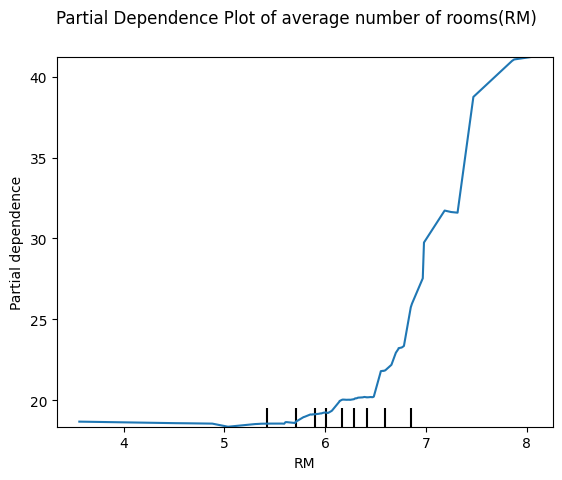

In [3]:
# 可視化
from sklearn.inspection import plot_partial_dependence
import matplotlib.pyplot as plt
%matplotlib inline

def plot_boston_pd(var_name, var_name_en):
    """PDを可視化する関数"""
    
    fig, ax = plt.subplots()
    plot_partial_dependence(
        estimator=rf,
        X=X_test,
        features=[var_name],
        kind="average",
        ax=ax
    )
    fig.suptitle(f"Partial Dependence Plot of {var_name_en}({var_name})")
    fig.show()

plot_boston_pd("RM", "average number of rooms")

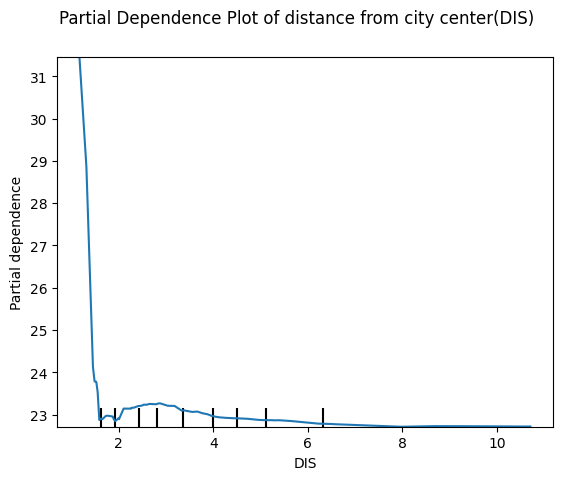

In [4]:
plot_boston_pd("DIS", "distance from city center")

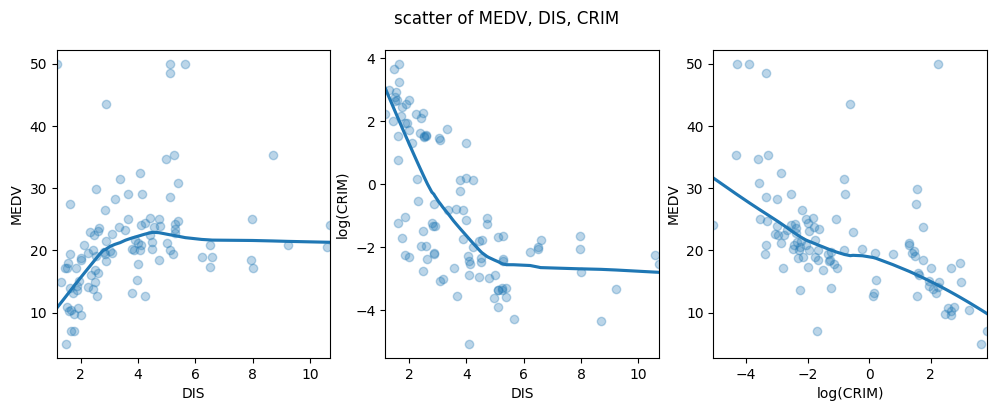

In [8]:
from functools import partial
import seaborn as sns

def plot_lowess():
    """MEDV, DIS, CRIMの関係を散布図とLOWESSで可視化"""
    
    lowess_plot = partial(
        sns.regplot,
        lowess=True,
        ci=None,
        scatter_kws={"alpha": 0.3}
    )
    
    fig, axes = plt.subplots(ncols=3, figsize=(12,4))
    
    # 都心からの距離と住宅価格
    lowess_plot(x=X_test["DIS"], y=y_test, ax=axes[0])
    axes[0].set(xlabel="DIS", ylabel="MEDV")
    
    # 都心からの距離と犯罪率(対数)
    lowess_plot(x=X_test["DIS"], y=np.log(X_test["CRIM"]), ax=axes[1])
    axes[1].set(xlabel="DIS", ylabel="log(CRIM)")
    
    # 犯罪率(対数)と住宅価格
    lowess_plot(x=np.log(X_test["CRIM"]), y=y_test, ax=axes[2])
    axes[2].set(xlabel="log(CRIM)", ylabel="MEDV")
    
    fig.suptitle('scatter of MEDV, DIS, CRIM')
    fig.show()
    
    
plot_lowess()

In [6]:
# 散布図だけでは他の特徴量の影響を考慮できない。